In [ ]:
"""
肉のGraph化
"""

\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial C_s(r, t)}{\partial r}\right) \\
  \frac{\partial C_s(r, t)}{\partial t} = D_s\left(\frac{a}{r}\frac{\partial C_s(r, t)}{\partial r}+\frac{\partial^2 C_s(r, t)}{\partial r^2}\right)
\end{equation*}

In [336]:
import numpy as np

In [354]:
#定数
kappa = 1.1e-7         # [m2/s]拡散係数
temp_init = 10.0       # [C]初期肉温度
rmax = 4 * 0.01 * 0.5  # half-diameter [m]　肉の厚さ
a_factor = 0         # 0 for slab, 1 for cylinder, 2 for sphere

tmax = 200.0 * 1.5 * (rmax / 0.005) ** 2 #肉を焼く時間
delta_t = 0.1 * (rmax / 0.005) ** 2 #時間のGrid数
delta_r = rmax / 25.0 #rのgrid分割
nr = int(rmax / delta_r) #rのgrid数
nstep = int(tmax / delta_t) #tのgrid数
#plot_intvl = 200　

In [355]:
#グリッド作成
r = np.linspace(0, rmax, nr, endpoint=True) - delta_r / 2
dtdt = np.empty((nr,))
temperature = np.full((nr,), temp_init)

In [356]:
#[C]境界条件
temp_boundary = 100.0  
temperature[-1] = temp_boundary  # outer boundary condition
dtdt[-1] = 0.0     # outer boundary condition (constant)

In [358]:
#微分方程式の定義
def time_derivative(temperature):
    dtdt[1:-1] = kappa * \
        ((temperature[2:] - 2.0 * temperature[1:-1] + temperature[0:-2]) / (delta_r * delta_r) \
         + a_factor / r[1:-1] * (temperature[2:] - temperature[0:-2]) / (2 * delta_r))
    dtdt[0] = dtdt[1]  # inner boundary condition temperature[0] = temperature[1]
    return dtdt

In [ ]:
#プロットを
def plot(temperature, i):
    

In [359]:
#実行部分
T_list = temperature
for i in range(nstep): 
    #if (i % plot_intvl == 0):
    #    plot_snap(temperature, i)
    #np.append(dtdt, time_derivative(temperature), axis=0)
    dtdt = time_derivative(temperature)
    temperature[:] = temperature[:] + delta_t * dtdt[:]
    T_list = np.append(T_list, temperature,).reshape(i+2,nr)
    #temperature_all = np.append(temperature_all, temperature, axis=0)
    #temperature_all[i] = temperature_all.append(temperature:])

type(fig): <class 'matplotlib.figure.Figure'>


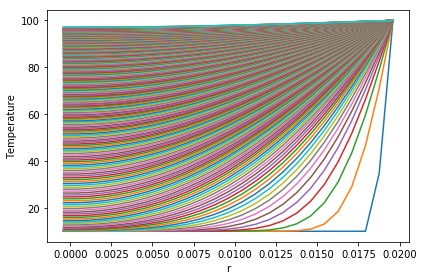

In [360]:
#graph
import matplotlib.pyplot as plt
fig = plt.figure() #figsize=(16,9))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(121)


#3 データを渡してプロット
Ngraph = 10
for i in range(int(nstep/Ngraph)):
    ax1.plot(r, T_list[Ngraph*i], label='')

ax1.set_xlabel("r")
ax1.set_ylabel("Temperature")

#ax1.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)